## Import Necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
dataset = pd.read_csv('train.csv')
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,314.0,NaN,0,Transient,38.40,0,0,Check-Out,1/14/2019,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,1.0,NaN,0,Transient,62.80,0,0,Canceled,10/21/2017,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,12.0,NaN,0,Transient,110.00,0,0,Canceled,11/25/2018,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,NaN,200.0,0,Transient,45.00,0,0,Check-Out,10/18/2018,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,16.0,NaN,0,Transient,57.92,0,1,Canceled,8/24/2017,5


In [3]:
dataset.shape

(83293, 33)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

In [5]:
dataset.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             346
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11404
company                           78559


In [6]:
dataset = dataset.dropna(subset=['country']).reset_index(drop=True)
dataset.fillna(0, inplace = True)

## Exploratory Data Analysis (EDA)

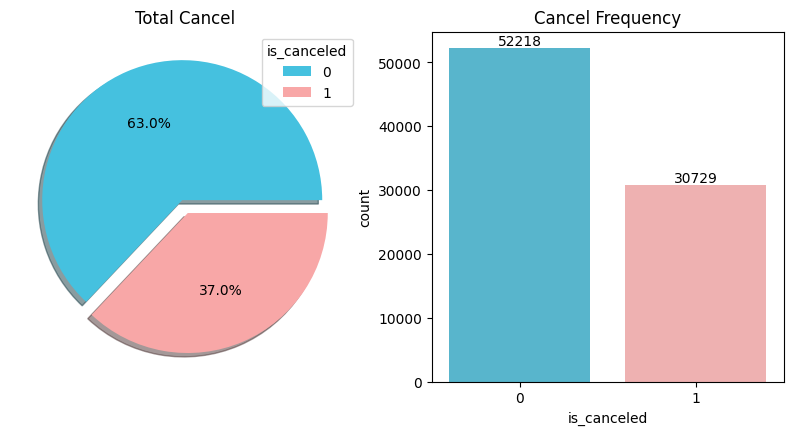

In [7]:
data_cancel = dataset['is_canceled'].value_counts()
fig = plt.figure(figsize=(10, 10))

explode = (0.05, 0.05)
ax1 = fig.add_subplot(2, 2, 1)
ax1.pie(data_cancel.values, explode=explode, shadow=True, autopct='%1.1f%%', colors=['#45C1DF', '#F8A7A7'])
ax1.set_title("Total Cancel")
ax1.legend(data_cancel.keys(), title="is_canceled")

ax2 = fig.add_subplot(2, 2, 2)
vis2 = sns.countplot(x=dataset['is_canceled'], ax=ax2, palette=['#45C1DF', '#F8A7A7'], linewidth=1)
ax2.set_title("Cancel Frequency")
for item in vis2.get_xticklabels():
    item.set_rotation(0)
for i in vis2.containers:
    vis2.bar_label(i,)

plt.show()

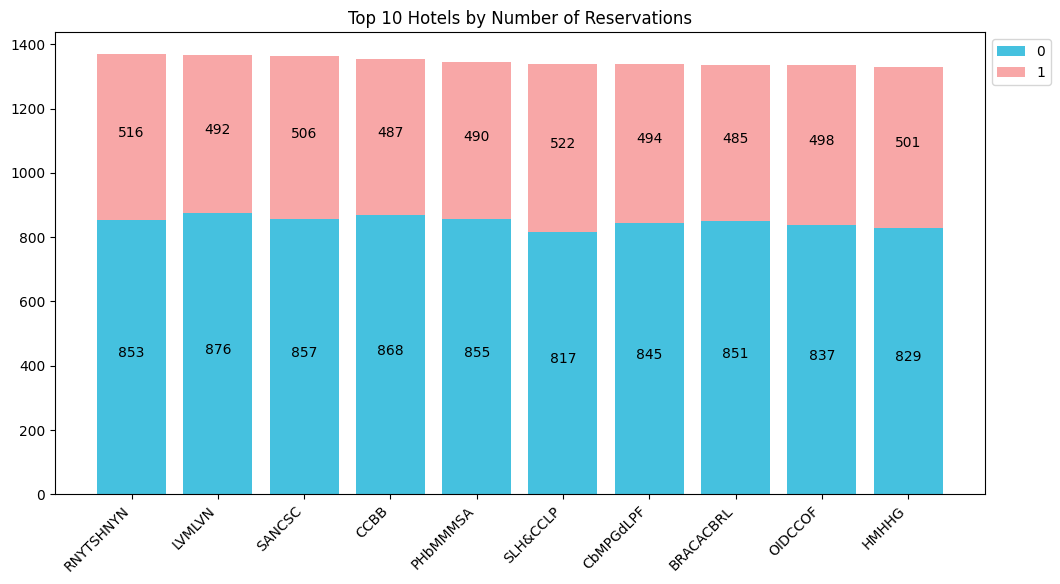

In [8]:
data_hotel = pd.DataFrame(dataset['hotel'].value_counts())

cancel_counts = pd.DataFrame(dataset.groupby("hotel")["is_canceled"].value_counts().unstack(fill_value=0))

data_hotel = pd.concat([data_hotel, cancel_counts], axis=1, ignore_index=True).reset_index()
data_hotel.columns = ['Hotel','Jumlah','0','1']

def ambil_inisial(nama):
    inisial = ''
    nama_split = nama.split()
    for kata in nama_split:
        inisial += kata[0]
    return inisial

data_hotel['Inisial'] = data_hotel['Hotel'].apply(lambda x: ambil_inisial(x))

top_hotel = data_hotel.nlargest(10, 'Jumlah')

fig, ax = plt.subplots(figsize=(12, 6))

# Stacked bar char
ax.bar(top_hotel['Inisial'], top_hotel['0'], color = '#45C1DF', label = "0")
ax.bar(top_hotel['Inisial'], top_hotel['1'], color = '#F8A7A7', bottom = top_hotel['0'], label = "1")

# Labels
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = '#000000', size = 10)

plt.xticks(rotation=45, ha="right")
ax.set_title("Top 10 Hotels by Number of Reservations")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))



plt.show()

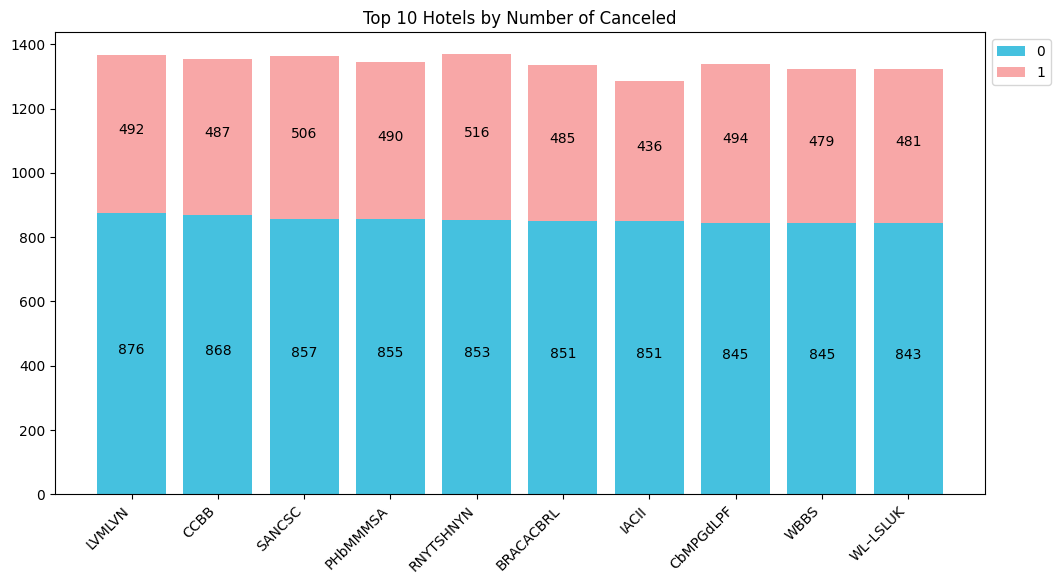

In [9]:
data_hotel = pd.DataFrame(dataset['hotel'].value_counts())

cancel_counts = pd.DataFrame(dataset.groupby("hotel")["is_canceled"].value_counts().unstack(fill_value=0))

data_hotel = pd.concat([data_hotel, cancel_counts], axis=1, ignore_index=True).reset_index()
data_hotel.columns = ['Hotel','Jumlah','0','1']

def ambil_inisial(nama):
    inisial = ''
    nama_split = nama.split()
    for kata in nama_split:
        inisial += kata[0]
    return inisial

data_hotel['Inisial'] = data_hotel['Hotel'].apply(lambda x: ambil_inisial(x))

top_hotel = data_hotel.nlargest(10, '0')

fig, ax = plt.subplots(figsize=(12, 6))

# Stacked bar char
ax.bar(top_hotel['Inisial'], top_hotel['0'], color = '#45C1DF', label = "0")
ax.bar(top_hotel['Inisial'], top_hotel['1'], color = '#F8A7A7', bottom = top_hotel['0'], label = "1")

# Labels
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = '#000000', size = 10)

plt.xticks(rotation=45, ha="right")
ax.set_title("Top 10 Hotels by Number of Canceled")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))



plt.show()

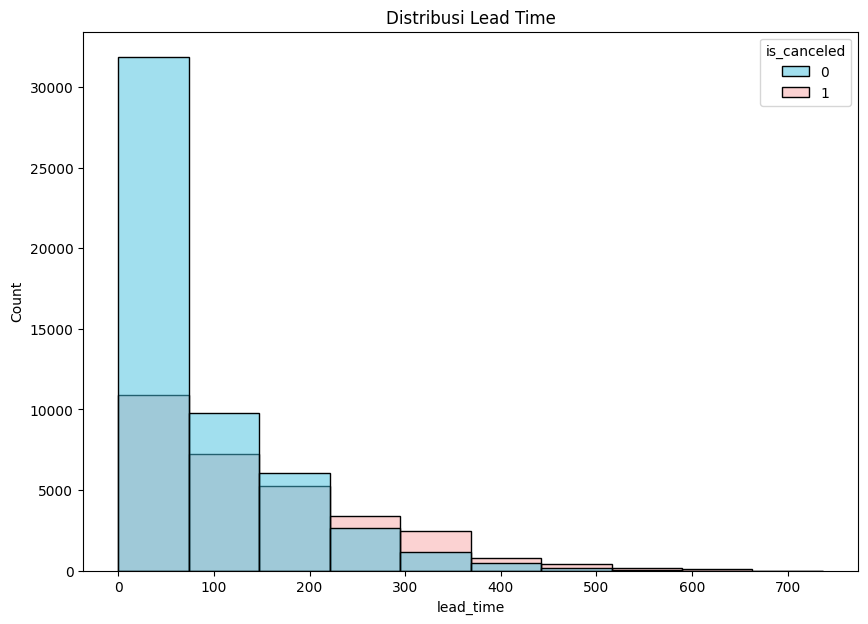

In [10]:
fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(1, 1, 1)
sns.histplot(dataset, x='lead_time', hue='is_canceled', bins=10, kde=False, palette=['#45C1DF', '#F8A7A7'], ax=ax)
plt.title('Distribusi Lead Time')
plt.show()

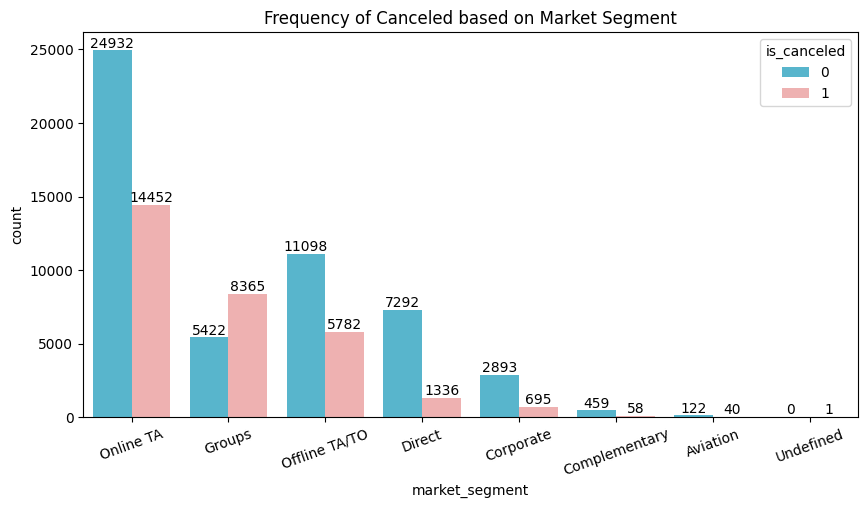

In [11]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
vis = sns.countplot(x='market_segment', hue='is_canceled', data=dataset, palette=['#45C1DF', '#F8A7A7'], ax=ax)
ax.set_title('Frequency of Canceled based on Market Segment')
for item in vis.get_xticklabels():
    item.set_rotation(20)
for i in vis.containers:
    vis.bar_label(i,)

plt.show()

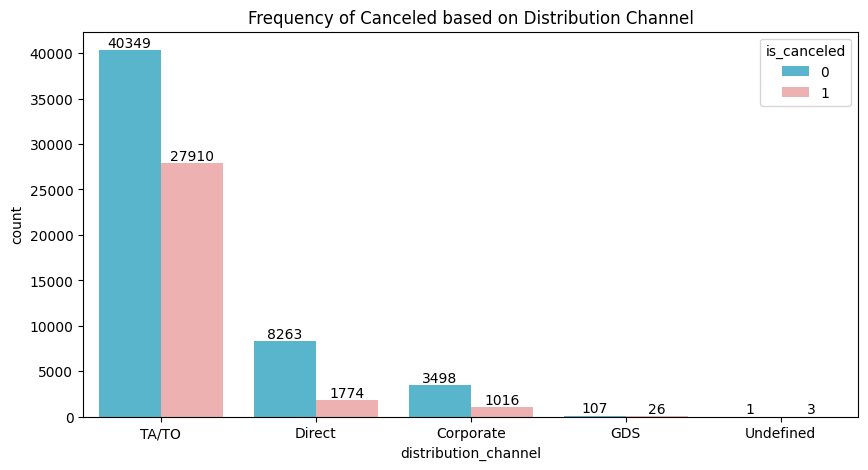

In [12]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
vis = sns.countplot(x='distribution_channel', hue='is_canceled', data=dataset, palette=['#45C1DF', '#F8A7A7'], ax=ax)
ax.set_title('Frequency of Canceled based on Distribution Channel')
for item in vis.get_xticklabels():
    item.set_rotation(0)
for i in vis.containers:
    vis.bar_label(i,)

plt.show()

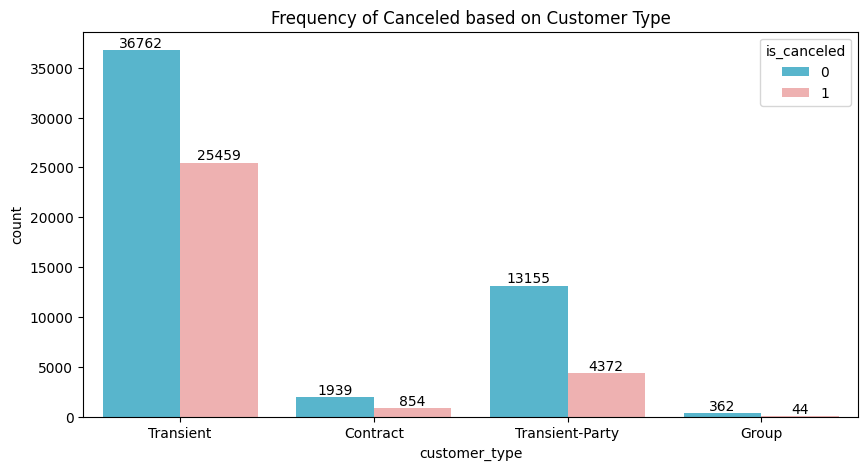

In [13]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
vis = sns.countplot(x='customer_type', hue='is_canceled', data=dataset, palette=['#45C1DF', '#F8A7A7'], ax=ax)
ax.set_title('Frequency of Canceled based on Customer Type')
for item in vis.get_xticklabels():
    item.set_rotation(0)
for i in vis.containers:
    vis.bar_label(i,)

plt.show()

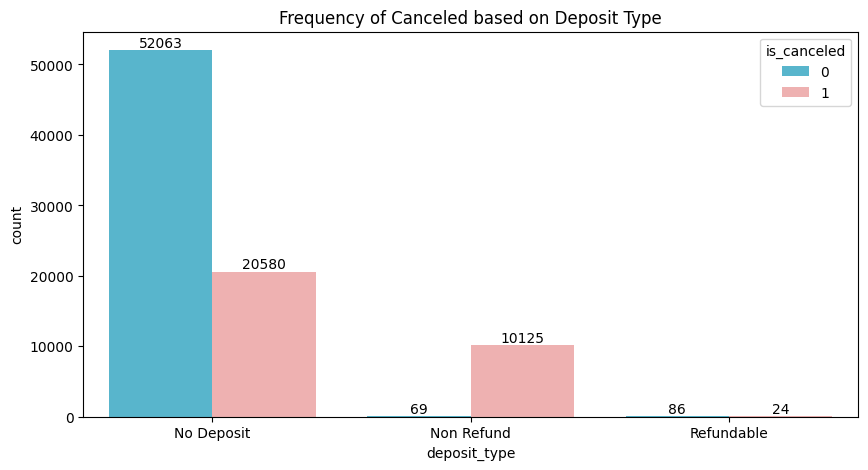

In [14]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
vis = sns.countplot(x='deposit_type', hue='is_canceled', data=dataset, palette=['#45C1DF', '#F8A7A7'], ax=ax)
ax.set_title('Frequency of Canceled based on Deposit Type')
for item in vis.get_xticklabels():
    item.set_rotation(0)
for i in vis.containers:
    vis.bar_label(i,)

plt.show()

## Data Pre-Processing

In [15]:
data_object = dataset[['market_segment', 'distribution_channel', 'deposit_type', 'customer_type']]
data_object

,market_segment,distribution_channel,deposit_type,customer_type
0,Online TA,TA/TO,No Deposit,Transient
1,Groups,TA/TO,Non Refund,Transient
2,Groups,TA/TO,Non Refund,Transient
3,Offline TA/TO,TA/TO,No Deposit,Transient
4,Groups,TA/TO,Non Refund,Transient
...,...,...,...,...
82942,Online TA,TA/TO,No Deposit,Transient
82943,Online TA,TA/TO,No Deposit,Transient
82944,Direct,Direct,No Deposit,Transient
82945,Online TA,TA/TO,No Deposit,Transient


In [16]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
dataset_encoded = encoder.fit_transform(data_object)

dataset_encoded_df = pd.DataFrame(dataset_encoded, columns = [
    'market_segment', 'distribution_channel', 'deposit_type', 'customer_type'])

dataset['market_segment'] = dataset_encoded_df['market_segment']
dataset['distribution_channel'] = dataset_encoded_df['distribution_channel']
dataset['deposit_type'] = dataset_encoded_df['deposit_type']
dataset['customer_type'] = dataset_encoded_df['customer_type']

dataset[['market_segment', 'distribution_channel', 'deposit_type', 'customer_type']]

,market_segment,distribution_channel,deposit_type,customer_type
0,6.0,3.0,0.0,2.0
1,4.0,3.0,1.0,2.0
2,4.0,3.0,1.0,2.0
3,5.0,3.0,0.0,2.0
4,4.0,3.0,1.0,2.0
...,...,...,...,...
82942,6.0,3.0,0.0,2.0
82943,6.0,3.0,0.0,2.0
82944,3.0,1.0,0.0,2.0
82945,6.0,3.0,0.0,2.0


## Feature Engineering

<ipython-input-17-60debe835004>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


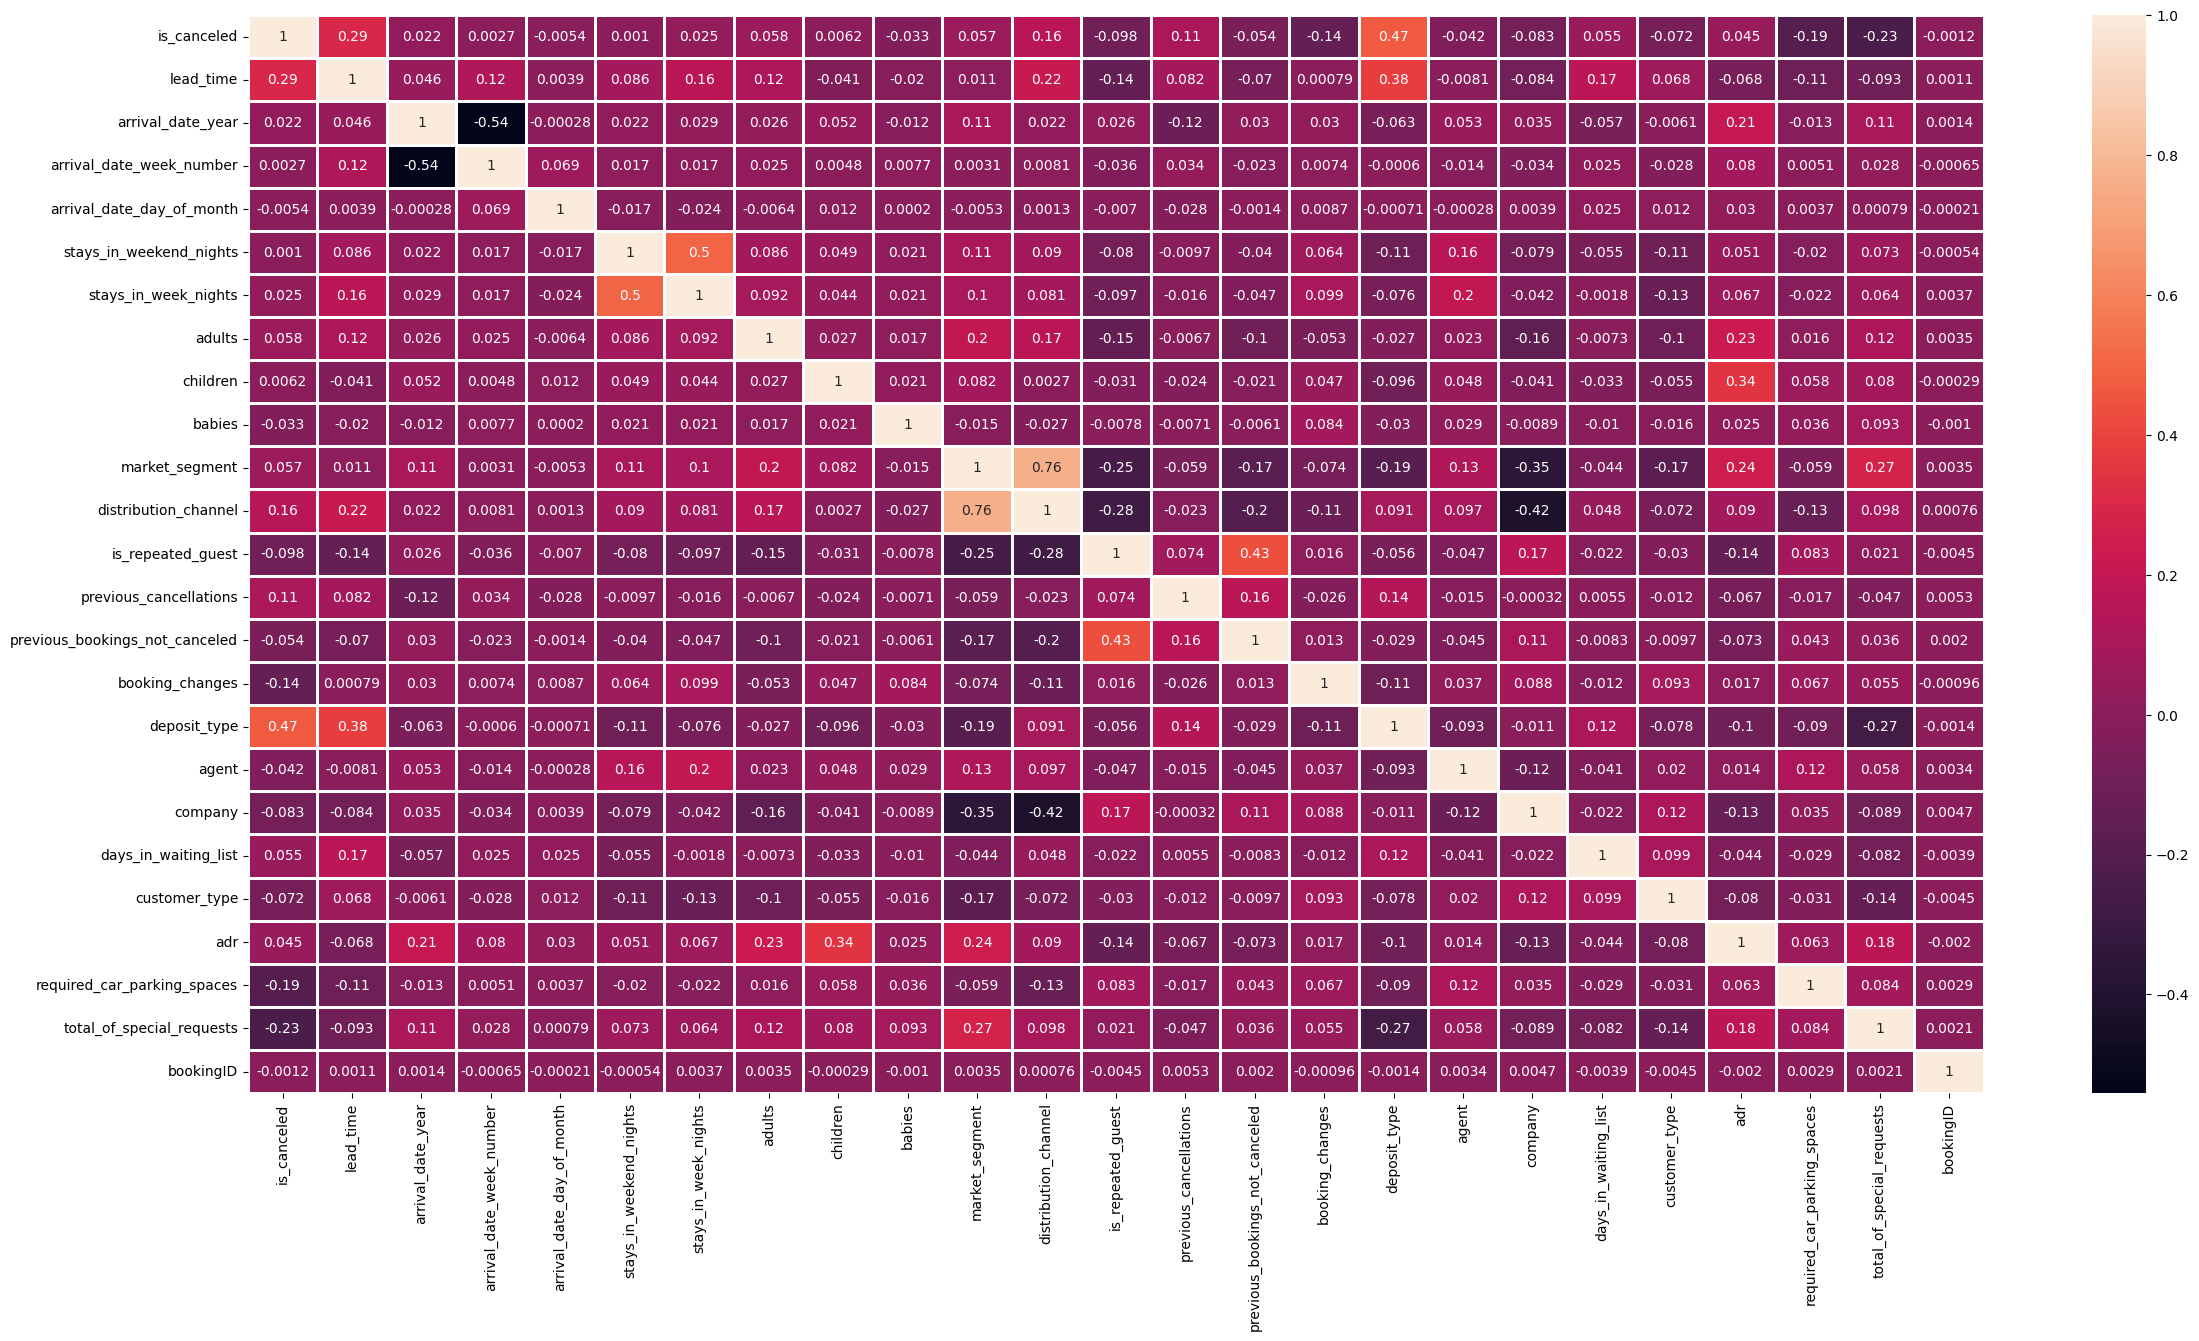

In [17]:
plt.figure(figsize = (28, 14))

corr = dataset.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [18]:
data = dataset[['lead_time','deposit_type']]
label = dataset['is_canceled']

data

,lead_time,deposit_type
0,8,0.0
1,524,1.0
2,175,1.0
3,33,0.0
4,395,1.0
...,...,...
82942,4,0.0
82943,30,0.0
82944,165,0.0
82945,180,0.0


## Normalisasi Data

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_norm = pd.DataFrame(scaler.fit_transform(data))
data_norm.columns = ['lead_time','deposit_type']

data_norm

,lead_time,deposit_type
0,0.010855,0.0
1,0.710991,0.5
2,0.237449,0.5
3,0.044776,0.0
4,0.535957,0.5
...,...,...
82942,0.005427,0.0
82943,0.040706,0.0
82944,0.223881,0.0
82945,0.244233,0.0


## Training The Model

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_norm, label, test_size=0.2, random_state=0)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
parameter = []
k = np.linspace(10, 50, 10, dtype=int)
metric = ['euclidean']
for n_k in k:
  for n_m in metric:
    clf = KNeighborsClassifier(n_neighbors=n_k, metric=n_m)
    clf.fit(x_train, y_train)
    training_accuracy.append(clf.score(x_train, y_train))
    test_accuracy.append(clf.score(x_test, y_test))
    parameter.append({'n_neighbors': n_k, 'metric': n_m})

In [22]:
data_accuracy = pd.DataFrame.from_dict(parameter)
data_accuracy['training_accuracy'] = training_accuracy
data_accuracy['test_accuracy'] = test_accuracy
data_accuracy

,n_neighbors,metric,training_accuracy,test_accuracy
0,10,euclidean,0.739168,0.742737
1,14,euclidean,0.748015,0.753526
2,18,euclidean,0.746929,0.752441
3,23,euclidean,0.748271,0.751537
4,27,euclidean,0.750200,0.753948
5,32,euclidean,0.753304,0.758107
6,36,euclidean,0.751240,0.756058
7,41,euclidean,0.751330,0.756359
8,45,euclidean,0.751827,0.757685
9,50,euclidean,0.753681,0.759855


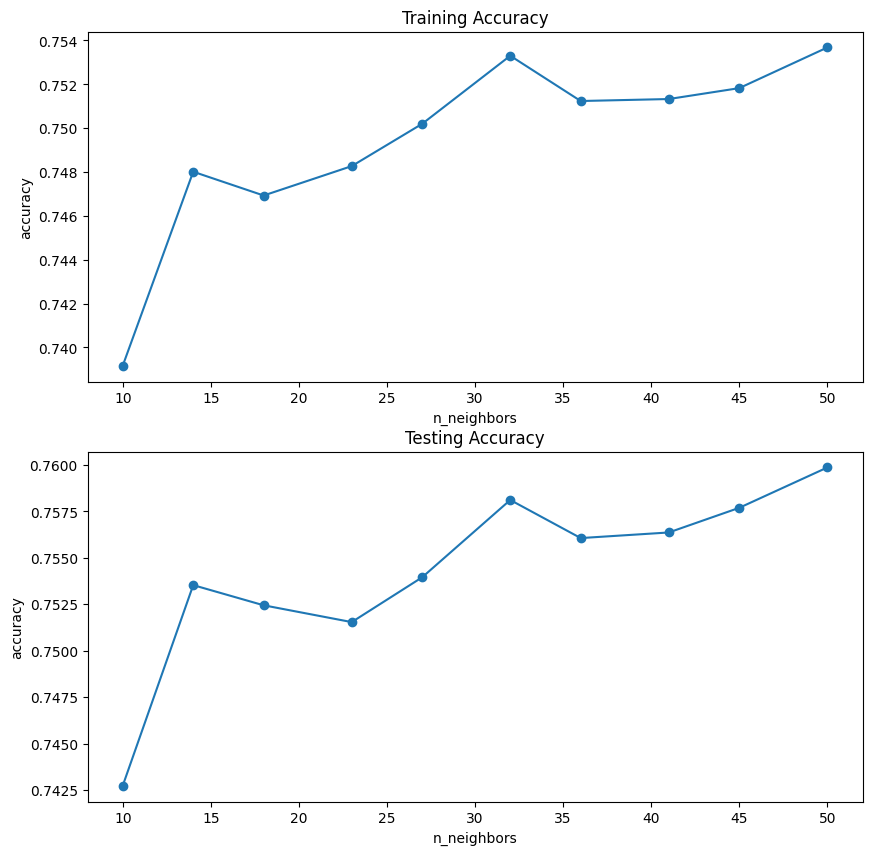

In [23]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(data_accuracy['n_neighbors'], data_accuracy['training_accuracy'], marker='o')
ax1.set_title("Training Accuracy")
ax1.set_xlabel('n_neighbors')
ax1.set_ylabel('accuracy')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(data_accuracy['n_neighbors'], data_accuracy['test_accuracy'], marker='o')
ax2.set_title("Testing Accuracy")
ax2.set_xlabel('n_neighbors')
ax2.set_ylabel('accuracy')

plt.show()

### Accuracy

In [24]:
from sklearn.metrics import accuracy_score

#Model with best parameter
knn_best_model = KNeighborsClassifier(n_neighbors=50, metric='euclidean')
knn_best_model.fit(x_train, y_train)

#Accuracy
knn_train_acc = accuracy_score(y_train, knn_best_model.predict(x_train))
print('Train Accuracy:', round(knn_train_acc*100,2),'%')

knn_test_acc = accuracy_score(y_test, knn_best_model.predict(x_test))
print('Test Accuracy:', round(knn_test_acc*100,2),'%')

Train Accuracy: 75.37 %
Test Accuracy: 75.99 %


### Confusion Matrix

<Figure size 2000x2000 with 0 Axes>

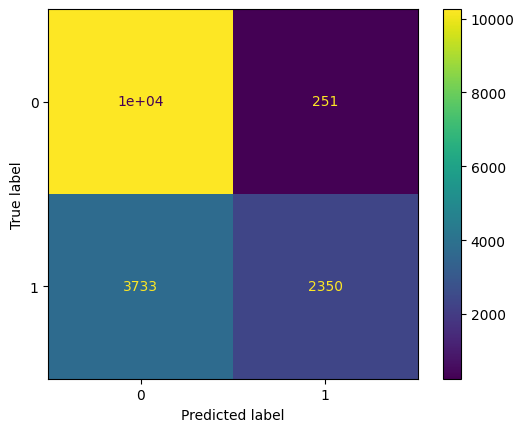

In [25]:
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
plt.figure(figsize=(20, 20))

cm_train = confusion_matrix(y_test, knn_best_model.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot()

plt.show()

In [26]:
cm_train

array([[10256,   251],
       [ 3733,  2350]])

### Classification Report

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_best_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84     10507
           1       0.90      0.39      0.54      6083

    accuracy                           0.76     16590
   macro avg       0.82      0.68      0.69     16590
weighted avg       0.80      0.76      0.73     16590



## PREDICT NEW DATA

In [28]:
dp = pd.read_csv('test.csv')
dp.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,Fort Worth University Drive Courtyard Fort Wor...,46,2019,July,27,3,1,0,2,0.0,...,79.0,NaN,0,Transient,89.38,0,0,Canceled,5/31/2019,83293
1,Sacramento Airport Natomas Courtyard Sacrament...,98,2017,November,48,23,1,2,1,0.0,...,37.0,NaN,0,Transient-Party,70.00,0,0,Check-Out,11/26/2017,83294
2,Residence Inn Las Vegas Convention Center Las ...,171,2019,July,30,28,0,1,2,0.0,...,168.0,NaN,0,Transient,80.10,0,0,Check-Out,7/29/2019,83295
3,Courtyard by Marriott Rio de Janeiro Barra da ...,2,2018,January,1,2,0,1,2,0.0,...,240.0,NaN,0,Transient,66.00,0,1,Check-Out,1/3/2018,83296
4,"Leipzig Marriott Hotel Leipzig, Germany",167,2019,May,20,14,2,1,2,0.0,...,9.0,NaN,0,Transient,126.00,0,1,Canceled,1/2/2019,83297


In [29]:
dp.shape

(35698, 32)

In [30]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35698 entries, 0 to 35697
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           35698 non-null  object 
 1   lead_time                       35698 non-null  int64  
 2   arrival_date_year               35698 non-null  int64  
 3   arrival_date_month              35698 non-null  object 
 4   arrival_date_week_number        35698 non-null  int64  
 5   arrival_date_day_of_month       35698 non-null  int64  
 6   stays_in_weekend_nights         35698 non-null  int64  
 7   stays_in_week_nights            35698 non-null  int64  
 8   adults                          35698 non-null  int64  
 9   children                        35697 non-null  float64
 10  babies                          35698 non-null  int64  
 11  meal                            35698 non-null  object 
 12  country                         

In [31]:
dp.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              1
babies                                0
meal                                  0
country                             142
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              4925
company                           33636
days_in_waiting_list                  0


In [32]:
dp = dp.dropna(subset=['country']).reset_index(drop=True)
dp.fillna(0, inplace = True)

In [33]:
do = dp[['deposit_type']]
do

,deposit_type
0,No Deposit
1,No Deposit
2,No Deposit
3,No Deposit
4,No Deposit
...,...
35551,No Deposit
35552,No Deposit
35553,Non Refund
35554,No Deposit


In [34]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
dataset_encoded = encoder.fit_transform(do)

de = pd.DataFrame(dataset_encoded, columns = ['deposit_type'])

de

,deposit_type
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
35551,0.0
35552,0.0
35553,1.0
35554,0.0


In [35]:
data_new = pd.concat([dp[['lead_time']], de], axis=1, ignore_index=True)
data_new.columns = ['lead_time','deposit_type']

data_new

,lead_time,deposit_type
0,46,0.0
1,98,0.0
2,171,0.0
3,2,0.0
4,167,0.0
...,...,...
35551,59,0.0
35552,62,0.0
35553,114,1.0
35554,0,0.0


In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_norm_new = pd.DataFrame(scaler.fit_transform(data_new))
data_norm_new.columns = ['lead_time','deposit_type']

data_norm_new

,lead_time,deposit_type
0,0.064880,0.0
1,0.138223,0.0
2,0.241185,0.0
3,0.002821,0.0
4,0.235543,0.0
...,...,...
35551,0.083216,0.0
35552,0.087447,0.0
35553,0.160790,0.5
35554,0.000000,0.0


### Prediction

In [37]:
y = knn_best_model.predict(np.array(data_norm_new))
y = pd.DataFrame(y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [38]:
dp['is_canceled'] = y

dp[['lead_time','deposit_type','is_canceled']]

,lead_time,deposit_type,is_canceled
0,46,No Deposit,0
1,98,No Deposit,0
2,171,No Deposit,1
3,2,No Deposit,0
4,167,No Deposit,0
...,...,...,...
35551,59,No Deposit,0
35552,62,No Deposit,0
35553,114,Non Refund,1
35554,0,No Deposit,0


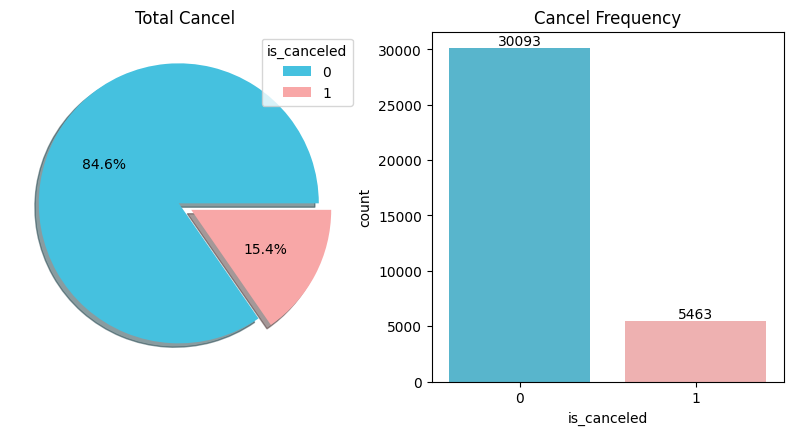

In [39]:
data_cancel_predict = dp['is_canceled'].value_counts()
fig = plt.figure(figsize=(10, 10))

explode = (0.05, 0.05)
ax1 = fig.add_subplot(2, 2, 1)
ax1.pie(data_cancel_predict.values, explode=explode, shadow=True, autopct='%1.1f%%', colors=['#45C1DF', '#F8A7A7'])
ax1.set_title("Total Cancel")
ax1.legend(data_cancel_predict.keys(), title="is_canceled")

ax2 = fig.add_subplot(2, 2, 2)
vis2 = sns.countplot(x=dp['is_canceled'], ax=ax2, palette=['#45C1DF', '#F8A7A7'], linewidth=1)
ax2.set_title("Cancel Frequency")
for item in vis2.get_xticklabels():
    item.set_rotation(0)
for i in vis2.containers:
    vis2.bar_label(i,)

plt.show()

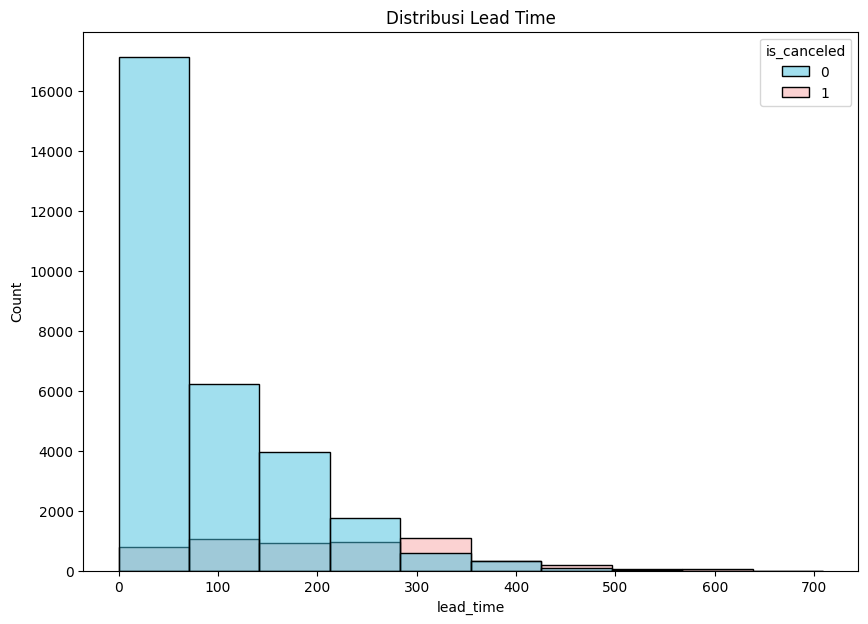

In [40]:
fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(1, 1, 1)
sns.histplot(dp, x='lead_time', hue='is_canceled', bins=10, kde=False, palette=['#45C1DF', '#F8A7A7'], ax=ax)
plt.title('Distribusi Lead Time')
plt.show()

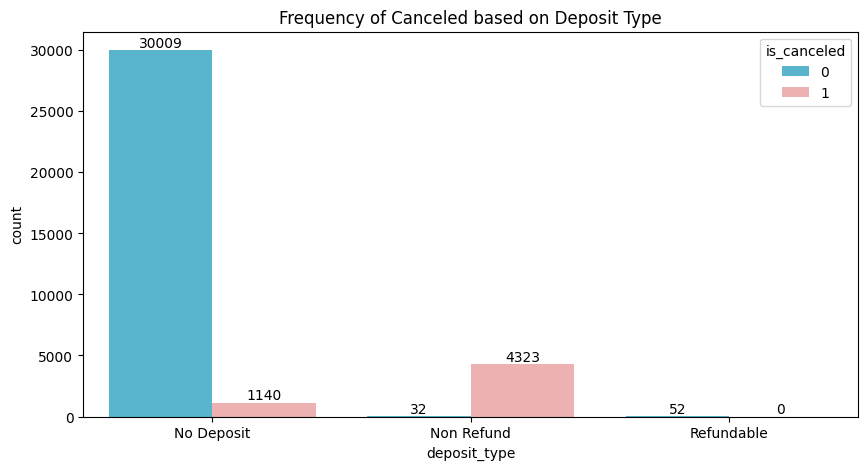

In [41]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
vis = sns.countplot(x='deposit_type', hue='is_canceled', data=dp, palette=['#45C1DF', '#F8A7A7'], ax=ax)
ax.set_title('Frequency of Canceled based on Deposit Type')
for item in vis.get_xticklabels():
    item.set_rotation(0)
for i in vis.containers:
    vis.bar_label(i,)

plt.show()